Install:

`mamba install ipykernel matplotlib scikit-learn numpy pandas`


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read in the data


In [146]:
df = pd.read_csv(
    "./data/TT-2018-H1-REDACTED-excluding-Postcodes.csv",
    delimiter=",",
    encoding_errors="replace",
)
df.dataframeName = "2018"

Clean up the data

In [188]:
# Rename columns
df = df.rename(columns={
  "ISF": "age", 
  "ISI": "householdSize",
  "ISJ": "numChildrenInHousehold"
})

# Remove participants with empty age
df = df.dropna(subset=["age"])
df = df[df.age != " "]

# Make boolean columns where necessary
df['isRetired'] = np.where(df['SGC'] == "Not working (i.e. under 8hrs/wk) - retired", 1, 0)
df['isHomebound'] = np.where(df['SGF'] == "Not working (i.e. under 8hrs/wk) - housewife/ disabled/ other", 1, 0)
df['usesDVDPlayer'] = np.where(df['QB2K'] == "Not", 0, 1)
df['usesGamesTV'] = np.where(df['QB2A'] == "Not", 0, 1)
df['usesIpod'] = np.where(df['QB2C'] == "Not", 0, 1)
df['usesEbook'] = np.where(df['QB2D'] == "Not", 0, 1)
df['usesGamesHandheld'] = np.where(df['QB2B'] == "Not", 0, 1)
df['usesSmartWatch'] = np.where(df['QB2H'] == "Not", 0, 1)
df['usesSmartSpeaker'] = np.where(df['QB2I'] == "Not", 0, 1)
df['usesGamesVR'] = np.where(df['QB2J'] == "Not", 0, 1)
df['usesMobile'] = np.where(df['QD2'] == "No mobiles in household", 0, 1)
df['usesSmartphone'] = np.where(df['QD24B'] == "Yes", 1, 0)

# Convert to proper data types
df["age"] = pd.to_numeric(df["age"])

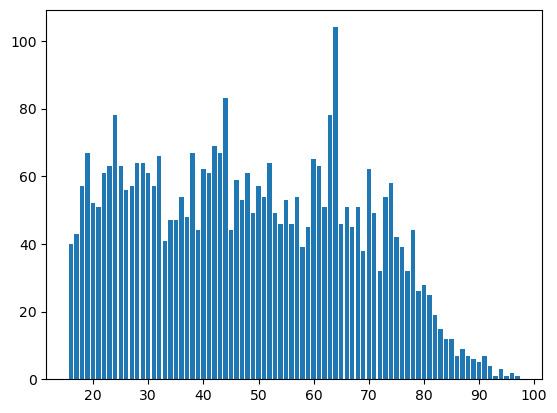

In [189]:
ageGroup = df.groupby("age")

ages = [(name) for name, group in ageGroup]
counts = [(len(group)) for name, group in ageGroup]
ageCounts = pd.DataFrame({"age": ages, "count": counts})

plt.bar("age", "count", data=ageCounts)
plt.show()

In [192]:
x = df["age"]

def percentOf(thisDF, ageVal, colName):
  subset = thisDF.loc[thisDF["age"] == ageVal]
  # print(subset.head())
  num = sum(subset[colName])
  total = len(subset)
  return num / total


[[16, 0.425], [17, 0.5581395348837209], [18, 0.42105263157894735], [19, 0.34328358208955223], [20, 0.40384615384615385], [21, 0.3333333333333333], [22, 0.4262295081967213], [23, 0.47619047619047616], [24, 0.46153846153846156], [25, 0.30158730158730157], [26, 0.3392857142857143], [27, 0.43859649122807015], [28, 0.46875], [29, 0.46875], [30, 0.5409836065573771], [31, 0.3508771929824561], [32, 0.42424242424242425], [33, 0.5121951219512195], [34, 0.3617021276595745], [35, 0.3404255319148936], [36, 0.5555555555555556], [37, 0.4375], [38, 0.5074626865671642], [39, 0.4772727272727273], [40, 0.5161290322580645], [41, 0.4918032786885246], [42, 0.5652173913043478], [43, 0.5373134328358209], [44, 0.42168674698795183], [45, 0.5227272727272727], [46, 0.6101694915254238], [47, 0.4339622641509434], [48, 0.5901639344262295], [49, 0.46938775510204084], [50, 0.543859649122807], [51, 0.5555555555555556], [52, 0.609375], [53, 0.3877551020408163], [54, 0.5869565217391305], [55, 0.6415094339622641], [56, 0.

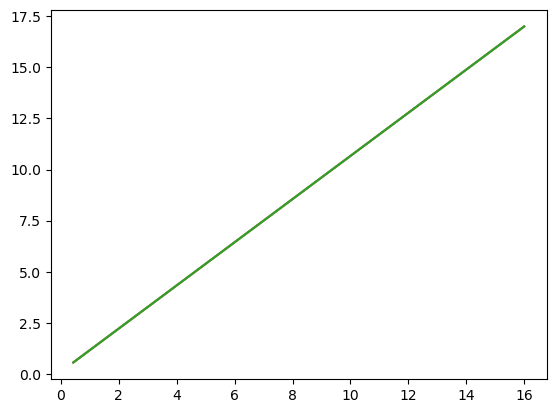

In [196]:
# https://www.tutorialspoint.com/how-can-i-create-a-stacked-line-graph-with-matplotlib
stackedData = []


for columnName in ["usesDVDPlayer", "usesGamesTV", "usesIpod"]:
  for age in ageCounts["age"]:
    pct = percentOf(df, age, columnName)
    stackedData.append({age: pct})



plt.plot(x, "usesGamesTV", data=df, label='Gaming (TV)')
plt.plot(x, "usesIpod", data=df, label='iPod')
plt.fill_between(x, "usesDVDPlayer", 0, color='orange')
plt.fill_between(x, "usesGamesTV", 0, color='blue')
plt.fill_between(x, "usesGamesTV", 0, color='red')
plt.legend()
plt.show()
plt.show()